In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from matplotlib import font_manager, rc
rc('font',family="AppleGothic")
plt.rcParams["font.family"]="AppleGothic" #plt 한글꺠짐
plt.rcParams["font.family"]="Arial" #외국어꺠짐
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정
plt.rc('figure', figsize=(10,8))

sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid') #sns 한글깨짐
#그래프 세팅
font = {'family': 'serif',
        'color':  'white',
        'weight': 'normal',
        'size': 20,
        }

#마이너스 폰트
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

#시각화?
import platform
platform.system()

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')




In [120]:
import pandas as pd

In [121]:
Total = pd.read_csv('Dataset/total/찐최종.csv')

In [122]:
Total = Total.drop(['인구밀도','범죄발생비율'],axis=1)

In [123]:
Total.head(1)

,시도명,시군구명,읍/면/동,설치유무,등록인구수,어린이보호구역개수,화재발생횟수,범죄총계(구),관광지개수
0,강원도,강릉시,주문진읍,1.0,17085.0,8.0,0.0,328.0,1.0


In [124]:
Total.to_csv('Dataset/F_Dataset/데이터원본.csv',index=0)

In [125]:
pd.read_csv('Dataset/F_Dataset/데이터원본.csv')

,시도명,시군구명,읍/면/동,설치유무,등록인구수,어린이보호구역개수,화재발생횟수,범죄총계(구),관광지개수
0,강원도,강릉시,주문진읍,1.0,17085.0,8.0,0.0,328.0,1.0
1,강원도,강릉시,성산면,0.0,3393.0,3.0,0.0,328.0,1.0
2,강원도,강릉시,왕산면,0.0,1648.0,2.0,0.0,328.0,0.0
3,강원도,강릉시,구정면,0.0,4096.0,5.0,0.0,328.0,0.0
4,강원도,강릉시,강동면,1.0,4690.0,3.0,0.0,328.0,0.0
...,...,...,...,...,...,...,...,...,...
638,충청북도,진천군,초평면,1.0,3508.0,4.0,0.0,980.0,0.0
639,충청북도,진천군,문백면,1.0,4147.0,4.0,0.0,980.0,0.0
640,충청북도,진천군,백곡면,1.0,2167.0,2.0,0.0,980.0,0.0
641,충청북도,진천군,이월면,0.0,8078.0,6.0,0.0,980.0,0.0


In [126]:
Grouped = Total.groupby(['시도명'])[['등록인구수']].sum()

In [127]:
Grouped.head(1)

,등록인구수
시도명,
강원도,1561313.0


In [128]:
Grouped = Grouped.reset_index()

In [129]:
Grouped = Grouped.rename(columns={'등록인구수':'등록인구수총계(시군구명)'})

In [130]:
Grouped.head(1)

,시도명,등록인구수총계(시군구명)
0,강원도,1561313.0


In [131]:
A = pd.merge(Total,Grouped,on=(['시도명']),how='left')

In [132]:
A.head(1)

,시도명,시군구명,읍/면/동,설치유무,등록인구수,어린이보호구역개수,화재발생횟수,범죄총계(구),관광지개수,등록인구수총계(시군구명)
0,강원도,강릉시,주문진읍,1.0,17085.0,8.0,0.0,328.0,1.0,1561313.0


In [133]:
A['인구밀도비율(구)'] = A['등록인구수'] / A['등록인구수총계(시군구명)']

In [134]:
A.head(1)

,시도명,시군구명,읍/면/동,설치유무,등록인구수,어린이보호구역개수,화재발생횟수,범죄총계(구),관광지개수,등록인구수총계(시군구명),인구밀도비율(구)
0,강원도,강릉시,주문진읍,1.0,17085.0,8.0,0.0,328.0,1.0,1561313.0,0.010943


In [135]:
A['예상범죄발생횟수'] = A['인구밀도비율(구)'] * A['범죄총계(구)']

In [136]:
A['인구밀도비율(구)'].sum()

9.0

In [137]:
A.head(1)

,시도명,시군구명,읍/면/동,설치유무,등록인구수,어린이보호구역개수,화재발생횟수,범죄총계(구),관광지개수,등록인구수총계(시군구명),인구밀도비율(구),예상범죄발생횟수
0,강원도,강릉시,주문진읍,1.0,17085.0,8.0,0.0,328.0,1.0,1561313.0,0.010943,3.58921


In [138]:
A.to_csv('Dataset/F_Dataset/파생변수데이터셋.csv',index=0)

In [139]:
A.head(1)

,시도명,시군구명,읍/면/동,설치유무,등록인구수,어린이보호구역개수,화재발생횟수,범죄총계(구),관광지개수,등록인구수총계(시군구명),인구밀도비율(구),예상범죄발생횟수
0,강원도,강릉시,주문진읍,1.0,17085.0,8.0,0.0,328.0,1.0,1561313.0,0.010943,3.58921


In [140]:
A = A.drop(['범죄총계(구)','등록인구수총계(시군구명)','인구밀도비율(구)'],axis=1)

In [141]:
A.head(1)

,시도명,시군구명,읍/면/동,설치유무,등록인구수,어린이보호구역개수,화재발생횟수,관광지개수,예상범죄발생횟수
0,강원도,강릉시,주문진읍,1.0,17085.0,8.0,0.0,1.0,3.58921


In [142]:
A.to_csv('Dataset/F_Dataset/파생변수_정리데이터셋.csv',index=0)

In [143]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features=[['등록인구수','어린이보호구역개수','화재발생횟수','관광지개수','예상범죄발생횟수']]
for feature in features:
    A[feature] = scaler.fit_transform(A[feature])
A.head(2)

,시도명,시군구명,읍/면/동,설치유무,등록인구수,어린이보호구역개수,화재발생횟수,관광지개수,예상범죄발생횟수
0,강원도,강릉시,주문진읍,1.0,0.081903,0.1000,0.0,0.2,0.007257
1,강원도,강릉시,성산면,0.0,0.015829,0.0375,0.0,0.2,0.001387


In [144]:
A.to_csv('Dataset/F_Dataset/최종데이터셋.csv',index=0)

In [145]:
A = pd.read_csv('Dataset/F_Dataset/최종데이터셋.csv')

In [146]:
A.corr()

,설치유무,등록인구수,어린이보호구역개수,화재발생횟수,관광지개수,예상범죄발생횟수
설치유무,1.000000,-0.094284,-0.006521,-0.096913,0.091346,0.231307
등록인구수,-0.094284,1.000000,0.811589,0.788874,0.006554,0.235147
어린이보호구역개수,-0.006521,0.811589,1.000000,0.741144,-0.014155,0.170189
화재발생횟수,-0.096913,0.788874,0.741144,1.000000,-0.004895,0.080852
관광지개수,0.091346,0.006554,-0.014155,-0.004895,1.000000,0.078242
예상범죄발생횟수,0.231307,0.235147,0.170189,0.080852,0.078242,1.000000


In [220]:
제외내용 = '화재발생횟수제외'

In [221]:
Test3= A[['설치유무','등록인구수','어린이보호구역개수','관광지개수','예상범죄발생횟수']]

In [222]:
Test3.to_csv('Dataset/F_Dataset/머신러닝결과/머신러닝Test3차.csv',index=0)

In [223]:
Test3 = pd.read_csv('Dataset/F_Dataset/머신러닝결과/머신러닝Test3차.csv')

In [224]:
Test3.columns

Index(['설치유무', '등록인구수', '어린이보호구역개수', '관광지개수', '예상범죄발생횟수'], dtype='object')

In [228]:
# 모델 평가 준비 작업
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# 독립변수, 종속변수 분리
y_t_df = Test3['설치유무'] # 종속변수
X_t_df = Test3.drop('설치유무', axis = 1) # 독립변수

# 독립변수 정규화
# X_t_df = preprocessing.StandardScaler().fit(X_t_df).transform(X_t_df)

# 학습용 데이터와 평가용 데이터를 8:2 혹은 7:3으로 분리
X_train, X_test, y_train, y_test = train_test_split(X_t_df, y_t_df, test_size = 0.2,
                                                   random_state = 11)

print(X_train.shape)
print(X_test.shape,'\n')

# 모델 학습 및 평가
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, rf_pred)

lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
lr_pred = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test,lr_pred)

print(f'Test3({제외내용})')
print('rf 정확도:{}, lr 정확도:{}'.format(accuracy_rf,accuracy_lr))

(514, 4)
(129, 4) 

Test3(화재발생횟수제외)
rf 정확도:0.8914728682170543, lr 정확도:0.875968992248062


Text(0.5, 1.0, 'Heatmap of the Dataset')

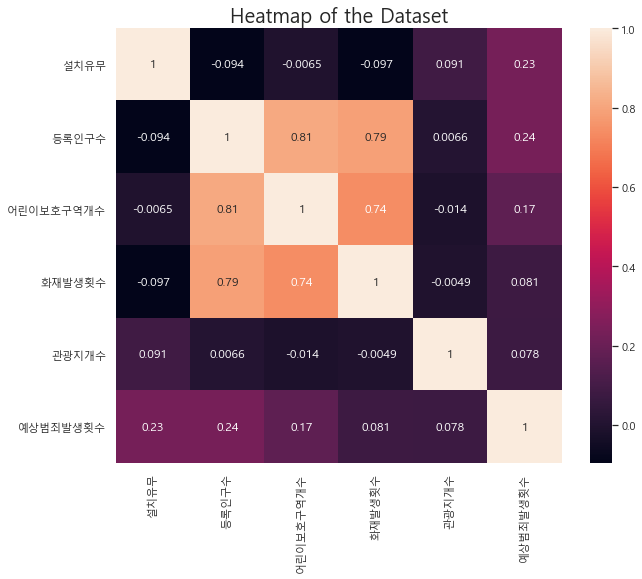

In [232]:
sns.heatmap(A[['설치유무','등록인구수','어린이보호구역개수','화재발생횟수','관광지개수','예상범죄발생횟수']].corr(),annot=True)
plt.title('Heatmap of the Dataset',fontsize=20)

In [3]:
A = pd.read_csv('Dataset/F_Dataset/최종데이터셋.csv')

In [7]:
display('정규화완료 Dataset')
display(A)

'정규화완료 Dataset'

,시도명,시군구명,읍/면/동,설치유무,등록인구수,어린이보호구역개수,화재발생횟수,관광지개수,예상범죄발생횟수
0,강원도,강릉시,주문진읍,1.0,0.081903,0.1000,0.0,0.2,0.007257
1,강원도,강릉시,성산면,0.0,0.015829,0.0375,0.0,0.2,0.001387
2,강원도,강릉시,왕산면,0.0,0.007408,0.0250,0.0,0.0,0.000639
3,강원도,강릉시,구정면,0.0,0.019221,0.0625,0.0,0.0,0.001688
4,강원도,강릉시,강동면,1.0,0.022088,0.0375,0.0,0.0,0.001943
...,...,...,...,...,...,...,...,...,...
638,충청북도,진천군,초평면,1.0,0.016383,0.0500,0.0,0.0,0.083195
639,충청북도,진천군,문백면,1.0,0.019467,0.0500,0.0,0.0,0.098362
640,충청북도,진천군,백곡면,1.0,0.009912,0.0250,0.0,0.0,0.051366
641,충청북도,진천군,이월면,0.0,0.038437,0.0750,0.0,0.0,0.191664


<AxesSubplot:xlabel='등록인구수', ylabel='Count'>

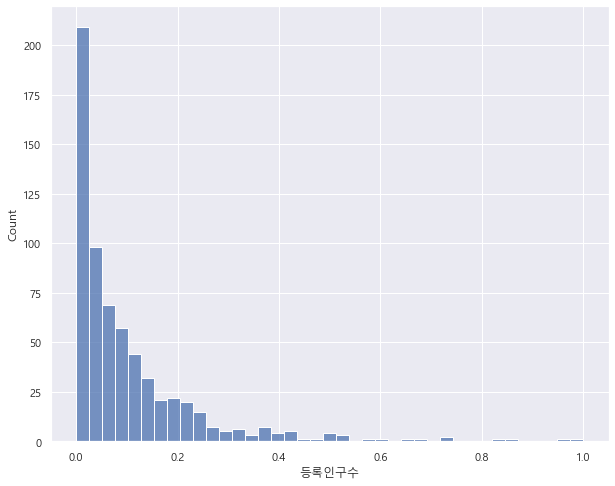

In [4]:
sns.histplot(data=A,x='등록인구수')

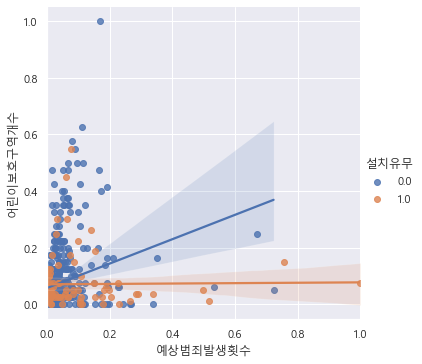

In [13]:
sns.lmplot(data=A,x='예상범죄발생횟수',y='어린이보호구역개수',hue='설치유무')

<AxesSubplot:xlabel='예상범죄발생횟수', ylabel='Count'>

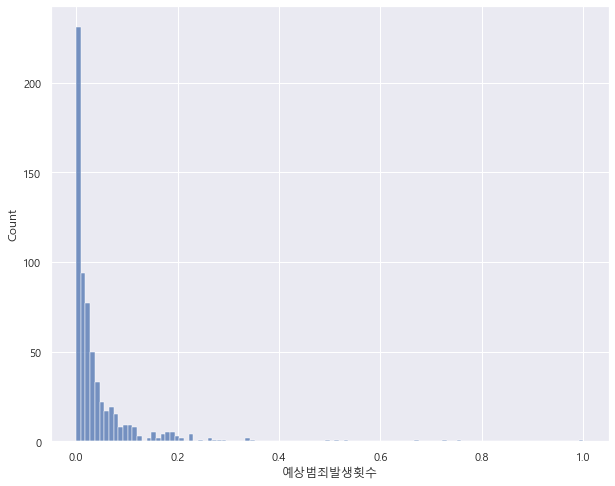

In [14]:
sns.histplot(data=A, x='예상범죄발생횟수')